<a href="https://colab.research.google.com/github/EdwardMMiller/Data-Mining-Project---Fall-2022/blob/main/News_Classifier_COLAB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **NEWS CLASSIFIER**

## DATA MINING - FALL 2022
## CUNY GRADUATE CENTER
## Edward Miller

## Overview

Over the past few decades, news sources have drastically shifted from print media to
online sites due to the widespread adoption of the internet by the general public. As a
consequence of this shift, it has become easier for news articles from untrustworthy
sources to pass themselves as real, and cause disinformation to spread rapidly. This
disinformation can cause widespread damage and is often used to push false narratives to
benefit a political party or a government. It has already caused harm to democratic
institutions by eroding trust in media sources, as well as motivating extreme actions based
on incorrect information, such as the Capitol Riots on January 6, 2021 . Therefore, it is now
more important than ever to develop sound methods for determining whether a news
story is real, or not. The intent of this project will be to use deep learning in order to train a
model that can correctly classify a list of news stories as real or not real.

## Goals
1. Train a deep learning model for binary classification to correctly classify whether a
news story is real
2. Test Trained Model on a dataset to determine how well it differentiates between the
two classes, and report findings.

## Dataset
The dataset, as well as the direct inspiration for this project, comes from the following kaggle
website, and the author of the code has some good insights that will be reused here as well.

https://www.kaggle.com/code/urkchar/determine-if-news-is-fake-or-real/notebook

Progress will be updated through Github here:

https://github.com/EdwardMMiller/Data-Mining-Project---Fall-2022/new/main

In [2]:
!pip install pandas
!pip install numpy
!pip install tensorflow==2.9.2'
!pip install keras
!pip3 install seaborn


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
/bin/bash: -c: line 0: unexpected EOF while looking for matching `''
/bin/bash: -c: line 1: syntax error: unexpected end of file
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [119]:
from absl import logging
import tensorflow as tf
import tensorflow_hub as hub
import keras as K
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import re
import seaborn as sns
from sklearn import metrics
from sklearn.utils import shuffle
from sklearn.model_selection import GridSearchCV, train_test_split
import re
import zipfile
# library imports

In [4]:
URL_T = 'https://raw.githubusercontent.com/EdwardMMiller/Data-Mining-Project---Fall-2022/main/True.csv'
URL_F = "https://raw.githubusercontent.com/EdwardMMiller/Data-Mining-Project---Fall-2022/main/Fake.csv"
# getting data from Github

True_df = pd.read_csv(URL_T)
Fake_df = pd.read_csv(URL_F)
# getting the csv files into dataframe

print("Number of rows in True_df = ", True_df.shape[0])
print("Number of rows in Fake_df = ", Fake_df.shape[0])
print("Number of columns in True_df = ", True_df.shape[1])
print("Number of columns in Fake_df = ", Fake_df.shape[1])
# Checking number of rows and columns in each dataset

columns_list_T = True_df.columns.tolist()
columns_list_F = Fake_df.columns.tolist()
print("List of columns in True_df", columns_list_T)
print("List of columns in False_df", columns_list_T)
# checking to see if columns are the same
#%%
def data_file_explore(file, df):

  """
    This is a simple function designed to do surface level
    exploration of the data in a csv file. It will print the
    first five rows of a data file, number of rows and columns in the data file
    number of unique values in the data value, and the number of missing values
    in the data file. It also inputs the minimum, maximum, mean and median
    for the numeric columns, and then finds the mode for the column along with
    the number of times it appears in that column. Finally, it also gets the
    most frequent string found for the string columns along with the number of
    times that string is found in the column. It is assumed that the data
    that is being worked with is either numeric or a string.

  Args:
    file = string referencing the filename
    df = a data frame created from reading in the file
  Returns:
    none
  """
  
  print("*********************** FILE NAME: %s ***********************\n" %file)

  # This is just a file header

  print("First five rows in file: %s\n" %file)
  display(df.head())
  # looking at the first five rows of the data

  print("\nData types present in file: %s\n" %file)
  print(df.dtypes)
  # looking at data types found in the dataframe

  print("\nNumber of rows and columns in file: %s\n" %file)
  display(df.shape)
  # Getting the size of the dataset

  print("\nNumber of unique values for each column in file: %s\n" %file)
  display(df.nunique())
  # Looking at number of unique values

  print("\nCount of missing values in file: %s\n" %file)
  display(df.isnull().sum())
  print("")
  # Counting the missing values in the datasets

  for col in df.select_dtypes(include=np.number):
    # Looping through numeric columns in data frame a
      #print("Min for col %s = %s" %(col, df[col].min()))
      #print("Max for col %s = %s" %(col, df[col].max()))
    print("Numerical Stats for column - '%s' " % col)
    print("--------------------------------------------")
    (print("Min: %s Mean: %s"
           %(df[col].min(), df[col].mean() )))
    print("Max: %s Median: %s" %(df[col].max(), df[col].median()))
    # Printing the minimum, maximum, mean and median

    col_mode = df[col].value_counts().idxmax()
    # get the most frequent value in the column
    freq = df[col].value_counts()[col_mode]
    # get the count of the most frequent value in the column

    if freq > 1:
      print("Most frequent value: %s found in column %s times.\n" %(col_mode,freq))
    else:
      print("No value repetitions found in column\n")
      # Only returning the most frequent value if it appears more than once

  for col in df.select_dtypes(include=object):
      # Only looking at columns with strings now
    print("Frequency counts for string column - '%s' " % col)
    print("--------------------------------------------------")
    col_mode = df[col].value_counts().idxmax()
      # get the most frequent value in the column
    freq = df[col].value_counts()[col_mode]
      # get the count of the most frequent value in the column
    if freq > 1:
      (print("Most frequent string value: '%s' found in column %s times.\n"
               %(col_mode,freq)))
    else:
      print("No value repetitions found in column\n")
        # Only returning the most frequent value if it appears more than once

data_file_explore('True.csv', True_df)
data_file_explore('Fake.csv', Fake_df)


Number of rows in True_df =  21417
Number of rows in Fake_df =  23481
Number of columns in True_df =  4
Number of columns in Fake_df =  4
List of columns in True_df ['title', 'text', 'subject', 'date']
List of columns in False_df ['title', 'text', 'subject', 'date']
*********************** FILE NAME: True.csv ***********************

First five rows in file: True.csv



,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"



Data types present in file: True.csv

title      object
text       object
subject    object
date       object
dtype: object

Number of rows and columns in file: True.csv



(21417, 4)


Number of unique values for each column in file: True.csv



title      20826
text       21192
subject        2
date         716
dtype: int64


Count of missing values in file: True.csv



title      0
text       0
subject    0
date       0
dtype: int64


Frequency counts for string column - 'title' 
--------------------------------------------------
Most frequent string value: 'Factbox: Trump fills top jobs for his administration' found in column 14 times.

Frequency counts for string column - 'text' 
--------------------------------------------------
Most frequent string value: '(Reuters) - Highlights for U.S. President Donald Trump’s administration on Thursday: The United States drops a massive GBU-43 bomb, the largest non-nuclear bomb it has ever used in combat, in Afghanistan against a series of caves used by Islamic State militants, the Pentagon says. Trump says Pyongyang is a problem that “will be taken care of” amid speculation that North Korea is on the verge of a sixth nuclear test. Military force cannot resolve tension over North Korea, China warns, while an influential Chinese newspaper urges Pyongyang to halt its nuclear program in exchange for Beijing’s protection. The Trump administration is focusing its North Korea stra

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"



Data types present in file: Fake.csv

title      object
text       object
subject    object
date       object
dtype: object

Number of rows and columns in file: Fake.csv



(23481, 4)


Number of unique values for each column in file: Fake.csv



title      17903
text       17455
subject        6
date        1681
dtype: int64


Count of missing values in file: Fake.csv



title      0
text       0
subject    0
date       0
dtype: int64


Frequency counts for string column - 'title' 
--------------------------------------------------
Most frequent string value: 'MEDIA IGNORES Time That Bill Clinton FIRED His FBI Director On Day Before Vince Foster Was Found Dead' found in column 6 times.

Frequency counts for string column - 'text' 
--------------------------------------------------
Most frequent string value: ' ' found in column 626 times.

Frequency counts for string column - 'subject' 
--------------------------------------------------
Most frequent string value: 'News' found in column 9050 times.

Frequency counts for string column - 'date' 
--------------------------------------------------
Most frequent string value: 'May 10, 2017' found in column 46 times.



## OVERVIEW OF DATA SETS

A cursory glance at the data shows that there are no missing values in either data set and that both column types
are the same along with matching data types. There are no numerical columns her, only text and dates. However, the author of the original project points out that the **True.csv** file  shows **WASHINGTON (Reuters) - ** or **SEATTLE/WASHINGTON (Reuters)** before the news articles. Also, there are **6** unique values for **'subject'** in the **Fake.csv** file and only **2** unique values for **'subject'** in the **True.csv**, which might cause the model while training the dataset to mainly look for these two things to determine whether the news article is fake. We will want to remove these things in order to ensure that it's not so obvious which one is which, and also ensure that the model will be able to work when classifying news stories that do not have this format, as one could then easily add the <Reuters> term to a fake news story, in order to trick the model into classifying it is as true.

In [5]:
cnt = 0
for row in True_df.index:
  if "(Reuters)" in True_df.loc[row]['text']:
     cnt = cnt + 1
print("Count of rows in True_df containing term (Reuters) = %s"% cnt )
print("Number of rows in True_df data frame = ", True_df.shape[0])
print("Percentage of rows in True_df containing (Reuters) = %s"% (cnt/True_df.shape[0]*100) )
print('')
# Counting the number of instances that contain the string "(Reuters)" in True_df

cnt = 0
for row in Fake_df.index:
  if "(Reuters)" in Fake_df.loc[row]['text']:
     cnt = cnt + 1
print("Count of rows in Fake_df containing term (Reuters) = %s"% cnt )
print("Number of rows in Fake_df data frame = ", Fake_df.shape[0])
print("Percentage of rows in Fake_df containing (Reuters) = %s"% (cnt/Fake_df.shape[0]*100) )
# Counting the number of instances that contain the string "(Reuters)" in Fake_df

Count of rows in True_df containing term (Reuters) = 21247
Number of rows in True_df data frame =  21417
Percentage of rows in True_df containing (Reuters) = 99.20623803520567

Count of rows in Fake_df containing term (Reuters) = 9
Number of rows in Fake_df data frame =  23481
Percentage of rows in Fake_df containing (Reuters) = 0.038328861632809505


As the original author also pointed out, this is something that needs to be addressed with the data before putting it into the model, as one can clearly see that over **99%** of the **True_df** rows contain the term **'(Reuters)'** and under **4%** of the rows in Fake_df contain this term. Let us also look at the 'subjects' column.

In [6]:
display(True_df['subject'].unique())
display(Fake_df['subject'].unique())
# looking at the unique values in the 'subjects' column

array(['politicsNews', 'worldnews'], dtype=object)

array(['News', 'politics', 'Government News', 'left-news', 'US_News',
       'Middle-east'], dtype=object)

Using the **'subjects'** column in the model would be a dead give-away to the model as the unique values in the **Fake_df** and **True_df** are totally different and seeing one subject or the other would train the model to look for that subject when classifying the news article as real or fake.  Therefore, the text data needs to be pre-processed and the subject column needs to be removed as well. Also, in order to get a better look at just the text itself to see if a model can determine which class it belongs to, the date column will be removed as well.

In [7]:
def text_clean(string):
  """
  This function removes this pattern "^[A-Z/]+ \(Reuters\) - "
  from a text string
  :param string: A single string
  :return:  A single string with the pattern removed
  """
  reuters_pattern = "^[A-Z/]+ \(Reuters\) - "
  # String to remove at the start of True_df looks like
  # WASHINGTON (Reuters) - so saving this pattern
  return re.sub(reuters_pattern, "", string)
##########################################################################
test_string1 = True_df.loc[0]['text']
print("String before text_clean function applied\n")
print(test_string1)
print('')
# getting a test string to test function

print("String after text_clean function applied\n")
print(text_clean(test_string1))
print('')
# testing function to see if it removes string

def df_pre_processor(df_t, df_f, Shuffle = True):
  """ This is a basic pre-processing function that takes in
  the two dataframes True_df and Fake_df, adds correct labels
  to each, combines them, cleans the text column, removes unneeded
  columns and shuffles the dataframe

  :param df_t: a dataframe containing all true news articles
  :param df_f: a dataframe containing all fake news articles
  :param  Shuffle: bool = True
  :return: a pre-processed data frame combined from df_t & df_f
  """
  df_t['label'] = True
  df_f['label'] = False
  # adding correct labels to each

  df = pd.concat([df_t, df_f], axis=0)
  df['text'] = df['text'] .apply(text_clean)
  # combining both data frames and
  # applying text clean to the text column

  df = df.drop(["subject", 'date'],axis = 1)
  # removing two columns from df

  if Shuffle:
     df = shuffle(df).reset_index(drop=True)
  # shuffles the dataframe before returning it
  return df
##########################################################################
df_combined = df_pre_processor(True_df.copy(), Fake_df.copy())
# putting both dataframes in pre-processing function
display(df_combined.head())
# looking at new data frame
bool_test = True_df.shape[0] \
            + Fake_df.shape[0] \
            == df_combined.shape[0]
print("Will print %sTrue%s if total rows are equal - %s" % ("'","'",bool_test))
# checking to make sure new data frame has correct dimensions

String before text_clean function applied

WASHINGTON (Reuters) - The head of a conservative Republican faction in the U.S. Congress, who voted this month for a huge expansion of the national debt to pay for tax cuts, called himself a “fiscal conservative” on Sunday and urged budget restraint in 2018. In keeping with a sharp pivot under way among Republicans, U.S. Representative Mark Meadows, speaking on CBS’ “Face the Nation,” drew a hard line on federal spending, which lawmakers are bracing to do battle over in January. When they return from the holidays on Wednesday, lawmakers will begin trying to pass a federal budget in a fight likely to be linked to other issues, such as immigration policy, even as the November congressional election campaigns approach in which Republicans will seek to keep control of Congress. President Donald Trump and his Republicans want a big budget increase in military spending, while Democrats also want proportional increases for non-defense “discretionary

,title,text,label
0,Germany will await prosecution 'ok' before del...,Germany will wait for Israeli prosecutors to c...,True
1,FORMER U.S. ATTORNEY: FBI’s Comey Considered T...,Former U.S. Attorney Joseph diGenova slammed F...,False
2,Two Senate Republicans critical of party's tax...,A Senate Republican tax plan that would repeal...,True
3,WHOA! PAUL RYAN Channels Trump…Blasts POLITICO...,"House Speaker Paul Ryan (R., Wis.) on Tuesday ...",False
4,Cambodian PM says main opposition party will b...,PHNOM PENH (Reuters) - Cambodian Prime Ministe...,True


Will print 'True' if total rows are equal - True


We now have a dataframe that can be used for the next steps. Our next step is to separate the data in train and test sections and the labels will need to be separated as well.  

In [8]:
columns_list = df_combined.columns[::].tolist()
columns_list.remove('label')
# saving columns list for features minus label
train_x, test_x, train_y, test_y = train_test_split(df_combined[columns_list],
                                                    df_combined['label'],
                                                    test_size=0.2,
                                                    random_state=5)
# Splitting data in train and test groups
display(train_x)
display(train_y)
display(test_x)
display(test_y)

,title,text
41124,Facebook Founder Tells Trump to go F*ck Himse...,"Donald Trump is horrible, and Facebook founder..."
22642,OOPS! #DEPLORABLE HILLARY JUST GOT BUSTED Offe...,"First, Hillary offended half of America when s..."
5161,Iran confirms upholding death sentence for aca...,Iran s Supreme Court has upheld a death senten...
25434,Super Bowl QB Peyton Manning Bankrolling This...,When you sit down to watch the Super Bowl cont...
2009,BUSTED: [Video] AARP Caught Using SUBLIMINAL M...,Could someone please explain this? I honestly ...
...,...,...
5520,Trump’s Son Thinks Batsh*t Crazy Pizzagate Co...,We can t say enough bad things about rape apol...
35814,France's Macron says external powers must stop...,French President Emmanuel Macron called on all...
20463,U.S. calling Rohingya operation 'ethnic cleans...,The U.S. labeling of a Myanmar army crackdown ...
18638,No Irish border deal before EU trade agreement...,Britain will not resolve the question of the I...


41124    False
22642    False
5161      True
25434    False
2009     False
         ...  
5520     False
35814     True
20463     True
18638     True
35683     True
Name: label, Length: 35918, dtype: bool

,title,text
10128,Michigan governor will be called to congressio...,Michigan Governor Rick Snyder and other offici...
43165,NY Times Columnist David Brooks: Trump Will B...,To say that David Brooks is not impressed with...
14627,Melania Trump hails 'empowerment of women' at ...,U.S. First Lady Melania Trump praised the “emp...
17654,Trump team doubles down on rebuke of civil rig...,Donald Trump’s vice president and top aides on...
28412,Trump agrees to pay $25 million to settle Trum...,NEW YORK/SAN DIEGO (Reuters) - Donald Trump ag...
...,...,...
16304,Sanders and Clinton battle for youth vote with...,"MANCHESTER, New Hampshire (Reuters) - Democrat..."
24306,TRUMP SPOKESPERSON THREATENS Trump Rally On Ma...,If the Trump campaign arranges a rally while O...
44244,Cruz Makes Baffling Bestiality Joke About Tru...,Ted Cruz has been on the warpath recently afte...
27014,Pennsylvania Democrats raise concerns over CP'...,Democrats from Pennsylvania’s congressional de...


10128     True
43165    False
14627     True
17654     True
28412     True
         ...  
16304     True
24306    False
44244    False
27014     True
4424     False
Name: label, Length: 8980, dtype: bool

After separating the data into **80% train** and **20% test** sets, a **validation set** is still needed from the training set, so that the test set can be used only for scoring

In [9]:
train_row_cnt = train_x.shape[0]
# saving number of rows

val_row_cnt = train_x.shape[0]//5
# getting closest integer to 20% of the rows for validation set

val_x = train_x[0:val_row_cnt]
val_y = train_y[0:val_row_cnt]
# splitting validation set off from training set

train_xr = train_x[val_row_cnt:]
train_yr = train_y[val_row_cnt:]
# reduced training set

In [10]:
train_text = train_xr['text'].copy().to_numpy()
train_title = train_xr['title'].copy().to_numpy()
# both title and text into arrays for train set

val_text = val_x['text'].copy().to_numpy()
val_title = val_x['title'].copy().to_numpy()
# both title and text into arrays for val set

test_text = test_x['text'].copy().to_numpy()
test_title = test_x['title'].copy().to_numpy()
# both title and text into arrays for test set

train_label = train_yr.copy().astype(int)
val_label = val_y.copy().astype(int)
test_label = test_y.copy().astype(int)
# converting True or False to 1 and 0s

In [11]:
print(train_text.shape)
print(val_text.shape)

print(train_label.shape)
print(val_label.shape)
# checking the shapes of the reduced train and validation sets

(28735,)
(7183,)
(28735,)
(7183,)


Now, we will use the template from tensorflow's **Text Classification with Movie Reviews** from here, in order to build a neural network that can classify the text and also use a pre-trained data set

https://www.tensorflow.org/hub/tutorials/tf2_text_classification

The first pre-trained set is the **Universal Sentence Encoder**

In [188]:
model = "https://tfhub.dev/google/universal-sentence-encoder/4"
# Universal Sentence Encoder Model
hub_layer = hub.KerasLayer(model, input_shape=[], dtype=tf.string, trainable=False)
# Trainable set to false in order to leave these layers and use transfer learning

In [189]:
model = tf.keras.Sequential()
model.add(hub_layer)
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(1))

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_5 (KerasLayer)  (None, 512)               256797824 
                                                                 
 dense_10 (Dense)            (None, 16)                8208      
                                                                 
 dense_11 (Dense)            (None, 1)                 17        
                                                                 
Total params: 256,806,049
Trainable params: 8,225
Non-trainable params: 256,797,824
_________________________________________________________________


In [190]:
model.compile(optimizer='adam',
              loss=tf.losses.BinaryCrossentropy(from_logits=True),
              metrics=[tf.metrics.BinaryAccuracy(threshold = 0.5, name='accuracy')])

callbacks = [tf.keras.callbacks.EarlyStopping(patience=10)]
# if validation score doesn't improve with 10 eppchs, stop

In [ ]:
history = model.fit(train_text,
                    train_label,
                    epochs=40,
                    batch_size=512,
                    validation_data=(val_text, val_label),
                    callbacks=callbacks, # early stopping line
                    verbose=1)
# This process takes a little over an hour

Epoch 1/40
57/57 [==============================] - 101s 2s/step - loss: 0.5820 - accuracy: 0.6031 - val_loss: 0.4554 - val_accuracy: 0.7682
Epoch 2/40
55/57 [===========================>..] - ETA: 2s - loss: 0.3803 - accuracy: 0.8376

In [ ]:
results = model.evaluate(test_text, test_label)
print(results)
# looking at the accuracy for the test set

After running the 40 epochs, we have an accuracy of **95.67 %**, which is pretty high, especially since this is only using the text portion of the article for classification. Also, we see that the model works well on unseen data as the validation and test scores are somewhat similar. We will continue to use the template from tensorflow as a guide to viewing the training and validation scores below.

In [ ]:
test_slice_x = test_text[5:30]
test_slice_y = test_label[5:30]
# just looking at a set of 25 articles

predictions = model.predict_on_batch(test_slice_x).flatten()
# getting a list of predictions into a 1d array

predictions = tf.nn.sigmoid(predictions)
# Apply a sigmoid since our model returns logits
predictions = tf.where(predictions < 0.5, 0, 1)
# get the actual predicted values using 0.5 as a threshold

print('Predictions: - First Model\n', predictions.numpy())
print('Labels:\n', test_slice_y.to_numpy())
# comparing the predictions to the true values

In [ ]:
history_dict = history.history
history_dict.keys()
# Information about the fitting process of the model

In [ ]:
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)
# add 1 since history starts from 0

plt.plot(epochs, loss, 'bo', label='Training loss')
# "bo" is for "blue dot"
plt.plot(epochs, val_loss, 'orange', label='Validation loss')
# b is for "solid blue line"
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()
# using same plotting methods from tensorflow hub 
# https://www.tensorflow.org/hub/tutorials/tf2_text_classification

In [ ]:
plt.clf()   # clear figure

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'orange', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

Let's repeat the steps above, but with a different pre-trained set of text. This is called **TF2.0 Saved Model (v2)** and comes from here.

https://tfhub.dev/google/nnlm-en-dim50/2

In [178]:
# TEST WITH DIFFERENT PRE-PROCESSED TEXT CORPUS

model2 = "https://tfhub.dev/google/nnlm-en-dim50/2"
# Token based text embedding trained on English Google News 7B corpus.

hub_layer2 = hub.KerasLayer(model2, input_shape=[], dtype=tf.string, trainable=False)
# Trainable set to false in order to leave these layers and use transfer learning

model2 = tf.keras.Sequential()
model2.add(hub_layer2)
model2.add(tf.keras.layers.Dense(16, activation='relu'))
model2.add(tf.keras.layers.Dense(1))
# template for neural network from tensorflow
model2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_4 (KerasLayer)  (None, 50)                48190600  
                                                                 
 dense_8 (Dense)             (None, 16)                816       
                                                                 
 dense_9 (Dense)             (None, 1)                 17        
                                                                 
Total params: 48,191,433
Trainable params: 833
Non-trainable params: 48,190,600
_________________________________________________________________


In [179]:
model2.compile(optimizer='adam',
              loss=tf.losses.BinaryCrossentropy(from_logits=True),
              metrics=[tf.metrics.BinaryAccuracy(threshold=0.5, name='accuracy')])

# NOTE: tensorflow tutorial shows threshold=0.0 
# trying default threshold=0.5 instead
# BinaryAccuracy(threshold=0.5 ,name='accuracy')])


history2 = model2.fit(train_text,
                    train_label,
                    epochs=120, # much faster model fitting time so triple
                               # the number of epochs
                    batch_size=512,
                    validation_data=(val_text, val_label),
                    callbacks=callbacks, # early stopping line
                    verbose=1)
# This process takes about 2 minutes or so

Epoch 1/120
57/57 [==============================] - 2s 33ms/step - loss: 0.5926 - accuracy: 0.6938 - val_loss: 0.4757 - val_accuracy: 0.8158
Epoch 2/120
57/57 [==============================] - 2s 30ms/step - loss: 0.4181 - accuracy: 0.8519 - val_loss: 0.3556 - val_accuracy: 0.8761
Epoch 3/120
57/57 [==============================] - 2s 30ms/step - loss: 0.3245 - accuracy: 0.8892 - val_loss: 0.2902 - val_accuracy: 0.9002
Epoch 4/120
57/57 [==============================] - 2s 30ms/step - loss: 0.2735 - accuracy: 0.9045 - val_loss: 0.2544 - val_accuracy: 0.9094
Epoch 5/120
57/57 [==============================] - 2s 30ms/step - loss: 0.2437 - accuracy: 0.9117 - val_loss: 0.2325 - val_accuracy: 0.9141
Epoch 6/120
57/57 [==============================] - 2s 30ms/step - loss: 0.2243 - accuracy: 0.9181 - val_loss: 0.2179 - val_accuracy: 0.9180
Epoch 7/120
57/57 [==============================] - 2s 31ms/step - loss: 0.2109 - accuracy: 0.9222 - val_loss: 0.2074 - val_accuracy: 0.9215
Epoch 

In [180]:
results2 = model2.evaluate(test_text, test_label)
print(results2)

281/281 [==============================] - 1s 4ms/step - loss: 0.1234 - accuracy: 0.9512
[0.12340660393238068, 0.9512249231338501]


The model above was run with three times as many epochs, and we ended up with an accuracy of **95.12%%** for our test set, again only using the **text** section of news articles, which is pretty high.

In [ ]:
predictions2 = model2.predict_on_batch(test_slice_x).flatten()
# getting a list of predictions into a 1d array

predictions2 = tf.nn.sigmoid(predictions2)
# Apply a sigmoid since our model returns logits
predictions2 = tf.where(predictions2 < 0.5, 0, 1)
# get the actual predicted values using 0.5 as a threshold

print('Predictions: - First Model\n', predictions.numpy())
print('Predictions - Second Model:\n', predictions2.numpy())
print('Labels:\n', test_slice_y.to_numpy())
# comparing the predictions to the true values

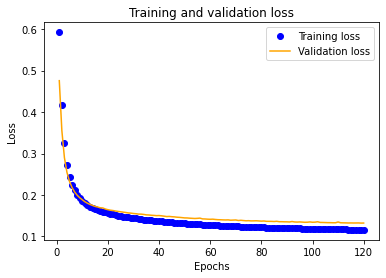

In [181]:
history_dict2 = history2.history

acc = history_dict2['accuracy']
val_acc = history_dict2['val_accuracy']
loss = history_dict2['loss']
val_loss = history_dict2['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'orange', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

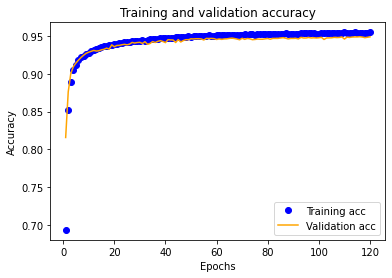

In [182]:
plt.clf()   # clear figure

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'orange', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

Here is a small field test for the model outside of the datasets above. In order to test the model a little bit more, let's test the model on four different news sources. The first article is from **'The Onion'**., a satyrical newspaper that only publishes fake articles designed for humor. Here is the article.

https://www.theonion.com/new-square-feature-allows-customers-to-tip-with-bible-q-1849855066

The next article is an article from CNN, which is a professional news organization.

https://www.cnn.com/2022/12/05/health/flu-vaccine-good-match/index.html

The third article is a fake article written for this experiment. There is no source for it as it has been made up on the spot.

The last article is from reuters, but with the beginning cut off. Again, this is a reliable news source, and here is the link to the article.

https://www.reuters.com/world/us/democrat-warnock-hopes-boost-partys-us-senate-margin-georgia-runoff-2022-12-06/

The model should classify this with results of **[0,1,0,1]**, 0 for a fake article and 1 for a real article.




In [183]:
onion_text1 = (
'''
SAN FRANCISCO—Updating the payment system to make sermonizing to service workers more efficient, a new Square feature released Tuesday allows customers to tip with Bible quotes. 
“We are proud to announce that the tipping experience is now more easier than ever with the addition of Bible passages,” said CEO Jack Dorsey, explaining that a selection screen will now appear after payment prompting the user with several preinstalled verses, from John 3:16 to the Psalms. 
“We have also heard our customers and are working to provide Christian cross and praying-hands emojis as well. For now, we still offer the smiley face option in lieu of tipping the barista or waiter money.” At press time, Square was developing a new “get a real job” tipping option."
'''
)

cnn_text1 =  (
'''
This year’s flu shot appears to be “a very good match” to the circulating strains, US Centers for Disease Control and Prevention Director Dr. Rochelle Walensky said at a news briefing Monday. However, she noted that flu vaccinations are lagging behind the pace of previous years.
Through the end of October, CDC data shows that vaccinations for pregnant women, a group that is more vulnerable to severe illness from influenza, are down about 12% from the same point in 2021.

Here's how to know when your child is too sick for school
Vaccination rates for seniors, the age group most likely to be hospitalized with influenza, were down about 3 percentage points from October 2021.

Flu vaccinations for children are down about 5% compared with where they were before the Covid-19 pandemic, Walensky said.
In a typical year, about 60% of American adults get vaccinated against influenza.
Flu hits the US hard
Flu season has gotten off to an early and severe start in the US, with hospitalization rates hitting levels that typically aren’t seen until December or January.
“We, of course, look in real time as to how well we think the influenza match is to what is circulating right now. The good news is that looks like it is a very good match,” Walensky said of the early start to the respiratory virus season.
She noted that the CDC would have more definitive data later in the season but that the data is encouraging.

Flu season continues to intensify in the US, and holiday gatherings could make it worse
Walensky said that even when the vaccine doesn’t closely match the circulating flu strains, “We see a 35% decrease in rates of hospitalization … which really just emphasizes, when we do have a good match, how much more effective it will be.”
CDC data shows that nearly 20,000 people in the United States were admitted to the hospital for flu during the week of Thanksgiving, almost double the number of admissions from the week before.
Covid-19 hospitalizations have ticked up as well, rising 27% in the week after Thanksgiving. But Covid-19 is no longer the only virus straining hospitals.
Just 5% of the US population lives in an area considered to have a high Covid-19 community level.

It seems like everyone's getting sick this winter. Parents and health care workers, how are you coping?
Walensky said Monday that the CDC was “actively looking into” expanding its community levels beyond Covid-19 to include the effects of other viruses, such as the flu.

“In the meantime, what I do want to say is, one need not take wait for CDC action in order to put a mask,” she said.
People who are sick should stay home and away from others, use good hygiene like covering coughs and washing hands frequently, use a high-quality mask and improve the ventilation in indoor spaces, Walensky said.
Treatment is available
If you do get sick, it’s important to get tested, even if you’ve been vaccinated, said Dr. Sandra Fryhofer, board chair of the American Medical Association and an internal medicine physician in Atlanta.
If you have Covid-19 or the flu, there are antiviral medications for both. But flu antivirals don’t work against Covid-19, and vice versa.

Children's health leaders call for emergency response as respiratory viruses continue to spread across the US
“It is going to be a confusing respiratory infections season. Figuring out what’s making people sick is going to be a conundrum,” Fryhofer said.
In response to a question about shortages of key medications during this rough virus season, Walensky said that “CDC is aware of the reports of some of the shortages for both antivirals as well as antibiotics across the country. I know FDA is working…with manufacturers to try and explore what can be done to address this.”
She also urged doctors not to prescribe antibiotics for illnesses caused by viruses.
Dr. William Schaffner, an infectious disease expert at Vanderbilt University Medical Center in Nashville, said he and his colleagues have been astonished by the steep increase in flu cases this season. They have also wondered what could be causing it.

As respiratory viruses strain US health care systems, Biden administration tells states how it's ready to help
He says it’s likely that after two years without much flu activity in the US, we lost some of our immunity against that virus just as the country has returned to more normal travel and activity patterns.
“Some of it has got to do with our behaviors in the past, having avoided flu and now opening up our lives to activities such as travel, religious services, getting together with families, going out to entertainment venues and doing all those things that take us into groups,” he said.
The flu vaccines are good at preventing severe outcomes, he said, but they don’t do much to stop the virus’ spread.
“It keeps you out of the emergency room, the hospital, the intensive care unit and the cemetery. It’s not very good at interrupting transmission, and it is not very good at preventing milder infection,” he said.

Schaffner says it’s likely that flu hospitalizations are going up because the virus is hitting the elderly, who, on the whole, tend to get less protection from vaccinations.
“The vaccine works least well among the population we most want to protect, namely older people, and that’s because they have immune systems that are much less robust than the immune systems of younger people.”
Schaffner noted that there are high-dose vaccines for seniors, which are preferred for this age group to help increase their protection.""
'''
)

my_text1 = (
'''
On Tuesday December 6, a fake news article was written in order to test this model. An asteroid
the size of Texas was heading towards the earth and a crisis was narrowly averted when scientists
hit it with a ballistic missle, successfully knocking it off course. However, the tides
were severly affected when the asteroid instead collided with the moon, leaving a large crater
that caused severe tidal effects on the oceans. 
'''
)

reuters_text1 = (
'''
Democratic U.S. Senator Raphael Warnock and Republican former football star Herschel Walker were locked in a tight battle as results came in from a runoff election in Georgia that will determine whether Democrats can expand their razor-thin Senate majority.
With 72% of the estimated vote tallied, Warnock led Walker by 50.4% to 49.6%, according to Edison Research. Final results were not expected until later in the evening.
'''
)

fake_true = [onion_text1, cnn_text1, my_text1, reuters_text1]
# saving a list of fake article, true article, fake article, true article

Outside_Test = pd.DataFrame(fake_true, columns = ['text']).to_numpy()
# saving list of articles to a dataframe

Outside_Test_labels = np.array([False, True, False, True]).astype(int)
# saving list of labels


In [ ]:
predictions3 = model.predict_on_batch([Outside_Test]).flatten() 
# NOTE: Here Outside_Test needs to be in [] to prevent errors
predictions3 = tf.nn.sigmoid(predictions3)
predictions3 = tf.where(predictions3 < 0.5, 0, 1)
print('Predictions using first model:\n', predictions3.numpy())
# First Model Predictions with just the 4 articles

predictions4 = model2.predict_on_batch(Outside_Test).flatten()
predictions4 = tf.nn.sigmoid(predictions4)
predictions4 = tf.where(predictions4 < 0.5, 0, 1)
print('Predictions using second model:\n', predictions4.numpy())
print('Labels:\n', Outside_Test_labels)
# Second Model Predictions with just the 4 articles